In [53]:
import pandas as pd
import matplotlib.pyplot as plt
 
 
df=pd.read_csv('imdb_cleaned_finale.csv')

In [2]:
df

,originalTitle,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,...,ratingCount,countryOfOrigin,genres,companiesNumber,averageRating,writerCredits,directorsCredits,soundMixes,quotesTotal,durationYears
0,Carmencita,6,1894,1,0,2,0,4,3,short,...,2092,['US'],Documentary,3,5.7,0,1,silent,0,2.0
1,Un bon bock,6,1892,12,0,2,0,2,0,short,...,183,['FR'],Animation,0,5.4,0,1,silent,0,2.0
2,Chinese Opium Den,5,1894,1,0,1,0,1,0,short,...,195,['US'],Short,1,5.0,0,1,silent,0,2.0
3,Edison Kinetoscopic Record of a Sneeze,6,1894,1,1,3,0,4,2,short,...,2238,['US'],Documentary,6,5.4,0,1,silent,0,2.0
4,L'arrivée d'un train à La Ciotat,8,1896,1,0,12,0,11,16,short,...,13115,['FR'],Documentary,5,7.4,0,2,silent,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,7,1993,96,0,0,0,11,0,movie,...,11,['CO'],Documentary,2,7.0,1,1,mono,0,2.0
149527,Eco,7,2019,14,0,4,1,52,1,short,...,15,['ES'],Drama,3,6.4,1,1,stereo,0,2.0
149528,Women Take Center Stage,6,2019,30,0,2,3,32,0,tvEpisode,...,12,unknown,Reality-TV,0,5.6,0,0,dolby_digital,0,2.0
149529,Horrid Henry and the Christening Crisis,8,2011,10,0,1,0,15,0,tvEpisode,...,10,unknown,Adventure,0,7.1,3,1,stereo,0,2.0


In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


In [35]:
# ✅ Veçoritë që do përdorim për LOF
lof_features = [
    'runtimeMinutes', 'averageRating', 'ratingCount', 'awardWins',
    'companiesNumber', 'writerCredits', 'directorsCredits',
    'totalImages', 'totalVideos', 'quotesTotal', 'durationYears'
]


In [55]:
# Heqim rreshtat me mungesa në këto kolona
df_lof = df[lof_features].dropna()

# ⚙️ Standardizimi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_lof)

# ✅ Aplikimi i LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Top 1% outliers
y_pred = lof.fit_predict(X_scaled)
lof_scores = -lof.negative_outlier_factor_

# 🧪 Shtojmë rezultatet në DataFrame
df_lof['LOF_score'] = lof_scores
df_lof['is_outlier'] = y_pred == -1

# ✅ Shfaqim vetëm outlierët nëse dëshiron
outliers = df_lof[df_lof['is_outlier'] == True]
print(outliers.head())

#


      runtimeMinutes  averageRating  ratingCount  awardWins  companiesNumber  \
566               35            7.0           12          0                2   
4985              30            8.3           58          0                2   
5529              30            8.2           54          0                1   
5539              30            7.0           48          0                2   
7542              35            6.4           19          0                0   

      writerCredits  directorsCredits  totalImages  totalVideos  quotesTotal  \
566               2                 1            1            0            0   
4985              0                 0            1            0            1   
5529              0                 0            1            0            0   
5539              0                 0            1            0            0   
7542              1                 1            0            0            0   

      durationYears  LOF_score  is_out

In [39]:
import pandas as pd

# Llogarisim sa është 1% e datasetit (nëse nuk e kemi tashmë)
n_outliers = int(0.01 * len(df_lof))

# Marrim top 1% outliers sipas LOF_score
top_lof_outliers = df_lof[df_lof['is_outlier']].copy()
top_lof_outliers = top_lof_outliers.sort_values(by='LOF_score', ascending=False).head(n_outliers)

# Shtojmë kolonë me index si ID për krahasim të mëvonshëm
top_lof_outliers['Outlier_ID'] = top_lof_outliers.index

# Përzgjedhim vetëm kolonat e nevojshme për raport
lof_table = top_lof_outliers[['Outlier_ID', 'LOF_score']]
lof_table.columns = ['Outlier', 'Score']  # për ta bërë të njëjtë me tabelën në slides

# Shfaqim tabelën
print(lof_table)


        Outlier         Score
73787     73787  2.626134e+09
81146     81146  2.466801e+09
134675   134675  2.378845e+09
115188   115188  6.292971e+08
115550   115550  5.899684e+08
...         ...           ...
70791     70791  5.301438e+00
82586     82586  5.301379e+00
72657     72657  5.301369e+00
147404   147404  5.293636e+00
136506   136506  5.292502e+00

[1495 rows x 2 columns]


In [47]:
# Numri total i outlierëve
num_outliers = df_iso['is_outlier_IF'].sum()
print(f"Numri total i outlierëve (Isolation Forest): {num_outliers}")


Numri total i outlierëve (Isolation Forest): 1496


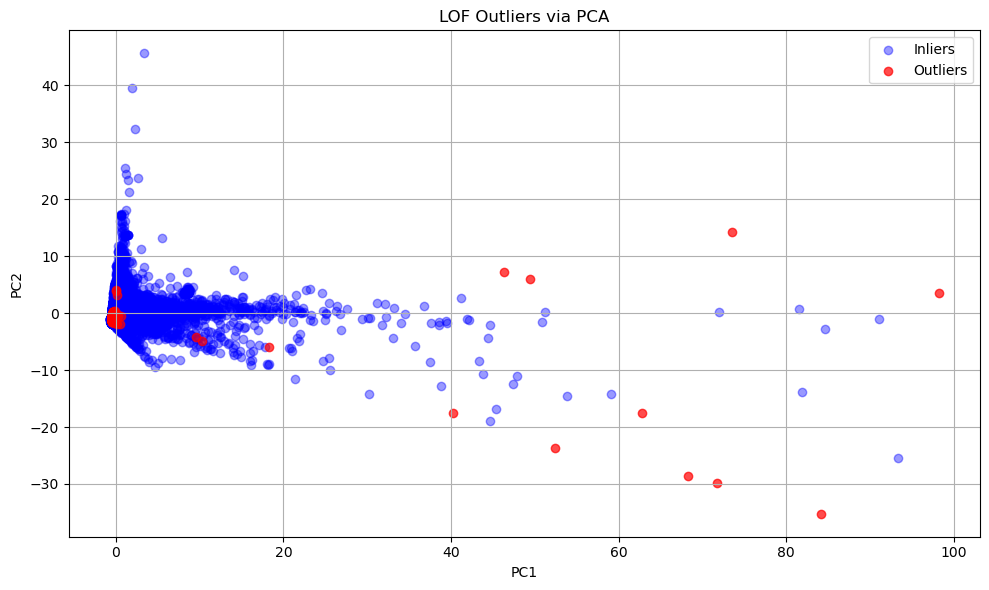

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplikojmë PCA në të dhënat e standardizuara
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Etiketat: True nëse është outlier, False nëse është inlier
labels = df_lof['is_outlier'].values

# Vizualizimi
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[~labels, 0], X_pca[~labels, 1], c='blue', label='Inliers', alpha=0.4)
plt.scatter(X_pca[labels, 0], X_pca[labels, 1], c='red', label='Outliers', alpha=0.7)
plt.title("LOF Outliers via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


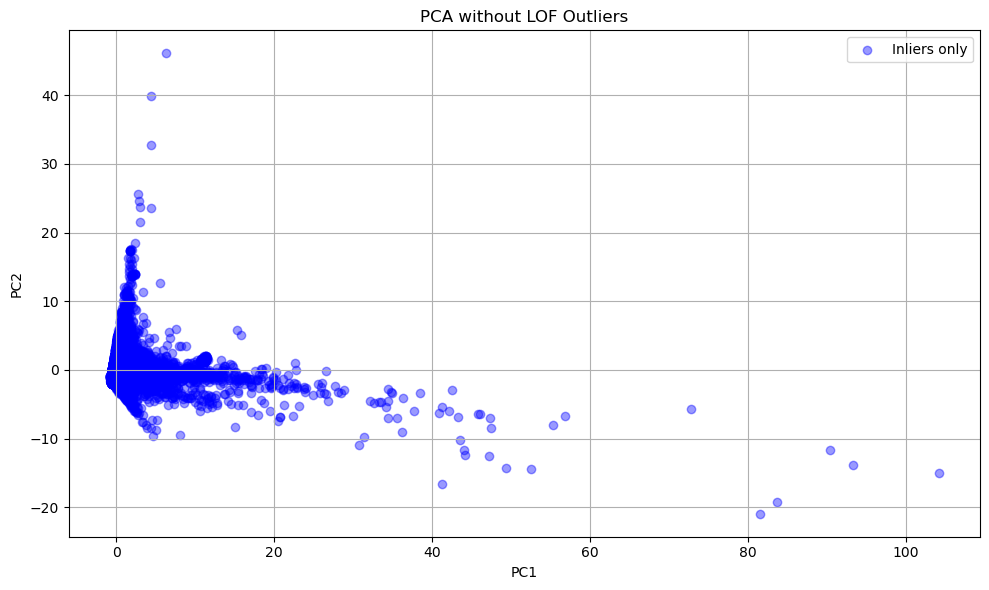

In [59]:
# 1. Heqim outlier-ët
X_inliers = X_scaled[~df_lof['is_outlier']]

# 2. PCA mbi vetëm inliers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_clean = PCA(n_components=2)
X_pca_clean = pca_clean.fit_transform(X_inliers)

# 3. Vizualizimi
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_clean[:, 0], X_pca_clean[:, 1], c='blue', alpha=0.4, label='Inliers only')
plt.title("PCA without LOF Outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### isolation forest

In [12]:
from sklearn.ensemble import IsolationForest

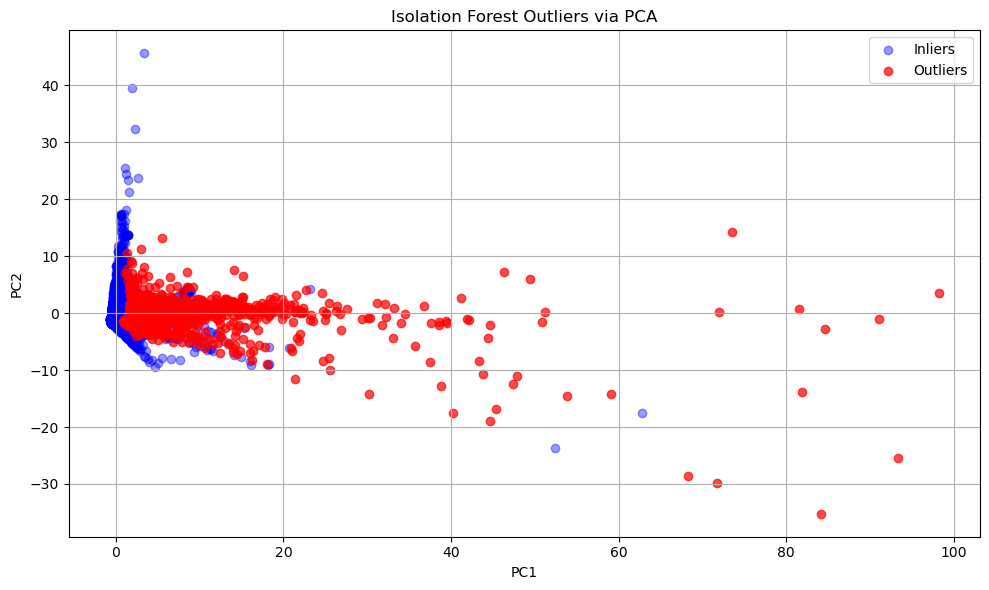

In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Leximi i datasetit nëse nuk është lexuar
df = pd.read_csv("imdb_cleaned_finale.csv")

# Veçoritë që do përdorim (si për LOF)
features = [
    'runtimeMinutes', 'averageRating', 'ratingCount', 'awardWins',
    'companiesNumber', 'writerCredits', 'directorsCredits',
    'totalImages', 'totalVideos', 'quotesTotal', 'durationYears'
]

# Heqim rreshtat me NaN
df_iso = df[features].dropna()

# Standardizimi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iso)

# ✅ Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
y_pred = iso.fit_predict(X_scaled)  # -1 = outlier, 1 = inlier
iso_scores = iso.decision_function(X_scaled)

# Shto rezultatet
df_iso['IF_score'] = -iso_scores  # më i madh = më shumë outlier
df_iso['is_outlier_IF'] = y_pred == -1

# ✅ PCA për vizualizim
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ✅ Vizualizimi
labels = df_iso['is_outlier_IF'].values
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[~labels, 0], X_pca[~labels, 1], c='blue', alpha=0.4, label='Inliers')
plt.scatter(X_pca[labels, 0], X_pca[labels, 1], c='red', alpha=0.7, label='Outliers')
plt.title("Isolation Forest Outliers via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Leximi i datasetit
df = pd.read_csv("imdb_cleaned_finale.csv")

# Zgjedhja e veçorive numerike
features = [
    'runtimeMinutes', 'averageRating', 'ratingCount', 'awardWins',
    'companiesNumber', 'writerCredits', 'directorsCredits',
    'totalImages', 'totalVideos', 'quotesTotal', 'durationYears'
]

df_iso = df[features].dropna()

# Standardizimi i të dhënave
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iso)

# Aplikimi i Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
y_pred = iso.fit_predict(X_scaled)
iso_scores = iso.decision_function(X_scaled)

# Shtojmë rezultatet në DataFrame
df_iso['IF_score'] = -iso_scores  # më i lartë = më shumë outlier
df_iso['is_outlier_IF'] = y_pred == -1

# Marrim top 1% outliers sipas Isolation Forest
n_outliers = int(0.01 * len(df_iso))
top_if = df_iso[df_iso['is_outlier_IF']].copy()
top_if = top_if.sort_values(by='IF_score', ascending=False).head(n_outliers)

# Krijojmë tabelën finale
top_if['Outlier'] = top_if.index
if_table = top_if[['Outlier', 'IF_score']]
if_table.columns = ['Outlier', 'Score']

# Printo tabelën
print(if_table.head())



        Outlier     Score
125716   125716  0.218159
22889     22889  0.208116
91804     91804  0.208051
2568       2568  0.205348
60114     60114  0.204731


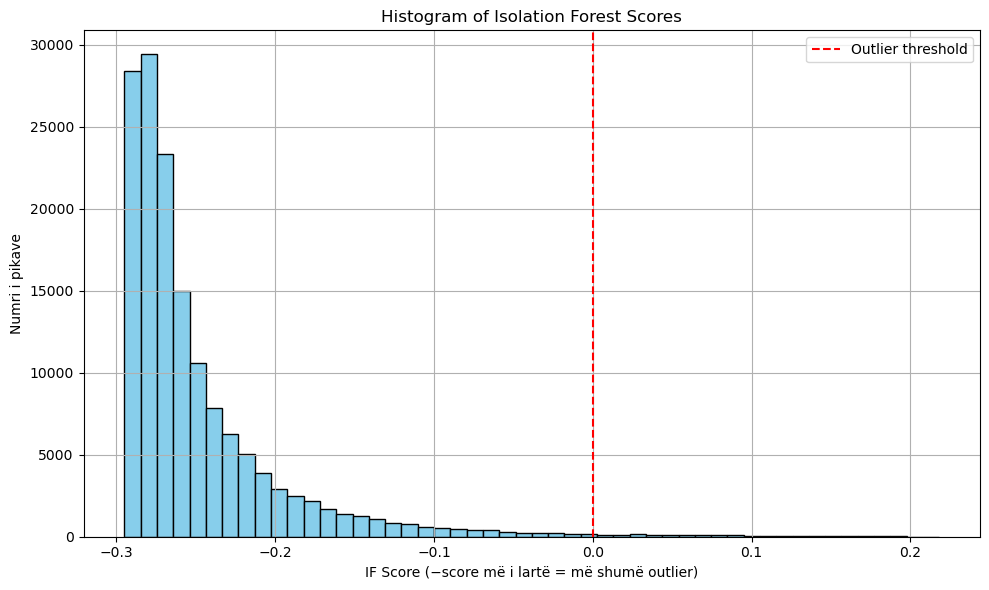

In [65]:
import matplotlib.pyplot as plt

# Histogramë për IF_score
plt.figure(figsize=(10, 6))
plt.hist(df_iso['IF_score'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(df_iso[df_iso['is_outlier_IF']]['IF_score'].min(), color='red', linestyle='--', label='Outlier threshold')
plt.title("Histogram of Isolation Forest Scores")
plt.xlabel("IF Score (−score më i lartë = më shumë outlier)")
plt.ylabel("Numri i pikave")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


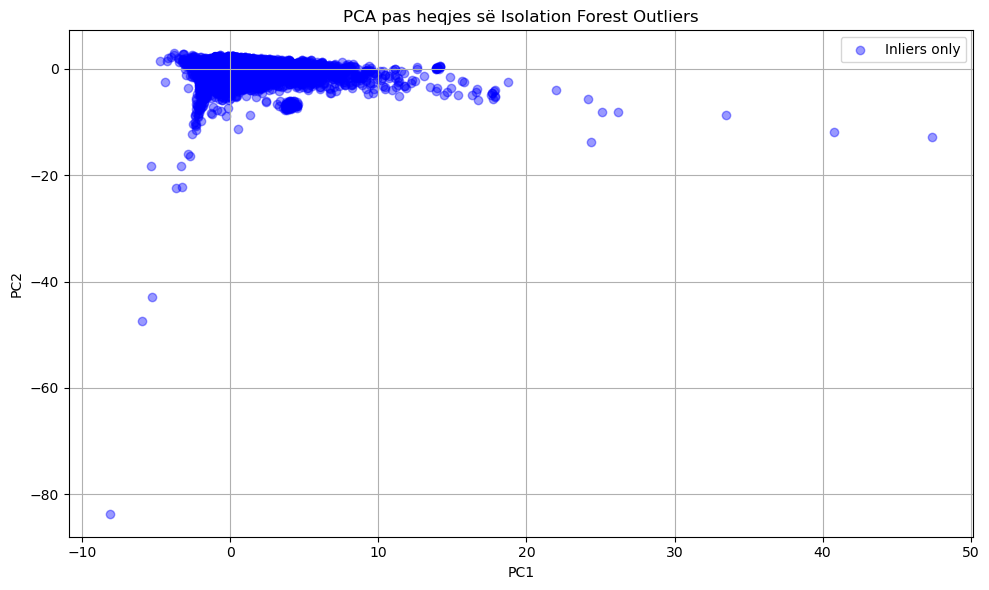

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Leximi i datasetit
df = pd.read_csv("imdb_cleaned_finale.csv")

# 2. Zgjedhja e veçorive numerike
features = [
    'runtimeMinutes', 'averageRating', 'ratingCount', 'awardWins',
    'companiesNumber', 'writerCredits', 'directorsCredits',
    'totalImages', 'totalVideos', 'quotesTotal', 'durationYears'
]

df_selected = df[features].dropna()

# 3. Standardizimi i të dhënave
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# 4. Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
y_pred = iso.fit_predict(X_scaled)
df_selected['is_outlier_IF'] = y_pred == -1

# 5. Heqim outliers
X_inliers_only = X_scaled[~df_selected['is_outlier_IF']]

# 6. Aplikojmë PCA
pca = PCA(n_components=2)
X_pca_clean = pca.fit_transform(X_inliers_only)

# 7. Vizualizimi
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_clean[:, 0], X_pca_clean[:, 1], c='blue', alpha=0.4, label='Inliers only')
plt.title("PCA pas heqjes së Isolation Forest Outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ABOD

In [20]:
!pip install pyod


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Leximi i datasetit
df = pd.read_csv("imdb_cleaned_finale.csv")

# 2. Veçoritë numerike
features = [
    'runtimeMinutes', 'averageRating', 'ratingCount', 'awardWins',
    'companiesNumber', 'writerCredits', 'directorsCredits',
    'totalImages', 'totalVideos', 'quotesTotal', 'durationYears'
]

df_abod = df[features].dropna()

# 3. Standardizimi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_abod)

# 4. ABOD me parametra të përmirësuar
abod = ABOD(contamination=0.01, method='fast', n_neighbors=60)
abod.fit(X_scaled)
abod_labels = abod.labels_         # 1 = outlier, 0 = inlier
abod_scores = abod.decision_scores_

# 5. PCA për vizualizim
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. Vizualizimi
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[abod_labels == 0, 0], X_pca[abod_labels == 0, 1], c='blue', alpha=0.4, label='Inliers')
plt.scatter(X_pca[abod_labels == 1, 0], X_pca[abod_labels == 1, 1], c='red', alpha=0.7, label='Outliers')
plt.title("PCA - ABOD Outlier Detection (Fast Mode)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Re-import all necessary libraries and reload dataset after kernel reset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pyod.models.abod import ABOD
import matplotlib.pyplot as plt

# Reload dataset
df = pd.read_csv("/mnt/data/imdb_cleaned_finale.csv")

# Define numerical features
features = [
    'runtimeMinutes', 'averageRating', 'ratingCount', 'awardWins',
    'companiesNumber', 'writerCredits', 'directorsCredits',
    'totalImages', 'totalVideos', 'quotesTotal', 'durationYears'
]

# Prepare data
df_abod = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_abod)

# Re-apply ABOD with improved settings
abod = ABOD(contamination=0.01, method='fast', n_neighbors=30)
abod.fit(X_scaled)
abod_labels = abod.labels_

# Filter inliers only
X_inliers_abod = X_scaled[abod_labels == 0]

# PCA on inliers
pca_abod_clean = PCA(n_components=2)
X_pca_abod_clean = pca_abod_clean.fit_transform(X_inliers_abod)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_abod_clean[:, 0], X_pca_abod_clean[:, 1], c='blue', alpha=0.4, label='Inliers only')
plt.title("PCA pas heqjes së ABOD Outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
# Supozojmë që kemi kolonat me etiketa nga LOF, IF, ABOD
df_results = pd.DataFrame()
df_results['LOF'] = df_lof['is_outlier']   # nga LOF
df_results['IF'] = df_lof['is_outlier_IF'] # nga Isolation Forest
df_results['ABOD'] = abod.labels_ == 1     # nga ABOD

# Shtojmë kolonë për overlaping
df_results['sum'] = df_results.sum(axis=1)

# Sa janë outliers në të gjitha metodat (sum = 3)?
all_three = df_results[df_results['sum'] == 3]
print("Outliers në të gjitha 3 metodat:", len(all_three))

# Mund të bësh edhe një histogram të sum për të parë shpërndarjen
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
df_results['sum'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Overlapping of Outliers Across Methods")
plt.xlabel("Number of Methods Detecting as Outlier")
plt.ylabel("Count")
plt.grid(True)
plt.show()


KeyError: 'is_outlier_IF'

In [23]:
## knn

In [69]:
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Përdor të njëjtat veçori si më parë
knn_features = [
    'runtimeMinutes', 'averageRating', 'ratingCount', 'awardWins',
    'companiesNumber', 'writerCredits', 'directorsCredits',
    'totalImages', 'totalVideos', 'quotesTotal', 'durationYears'
]

# Heq rreshtat me mungesa dhe standardizoj
df_knn = df[knn_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_knn)

# Apliko KNN outlier detection
knn = KNN(contamination=0.01)  # 1% outliers
knn.fit(X_scaled)

# Rezultatet
df_knn['knn_score'] = knn.decision_scores_
df_knn['is_outlier_knn'] = knn.labels_

# Shfaq disa outliers
outliers_knn = df_knn[df_knn['is_outlier_knn'] == 1]
print(outliers_knn.head())


      runtimeMinutes  averageRating  ratingCount  awardWins  companiesNumber  \
269              220            6.2          106          1                5   
879               95            8.1       120409          5               75   
975              250            6.9          350          0                2   
1274              16            7.6        54435          0               27   
1284              97            7.4        15481          0               42   

      writerCredits  directorsCredits  totalImages  totalVideos  quotesTotal  \
269               4                 4           21            0            0   
879               1                 1          107            1           11   
975               4                 2           15            0           16   
1274              2                 1           93            1            0   
1284              5                 1           37            1           88   

      durationYears  knn_score  is_out

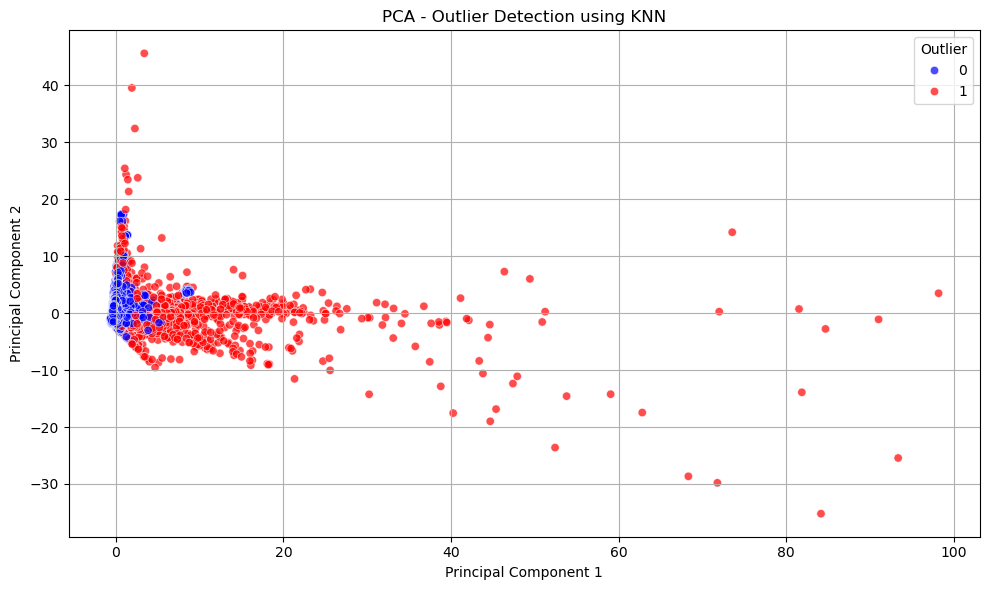

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA mbi të dhënat e standardizuara
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Shto komponentët PCA dhe etiketat në një DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['outlier'] = df_knn['is_outlier_knn']

# Vizualizim
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='outlier',
    palette={0: 'blue', 1: 'red'},
    data=pca_df,
    alpha=0.7
)
plt.title('PCA - Outlier Detection using KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outlier')
plt.grid(True)
plt.tight_layout()
plt.show()


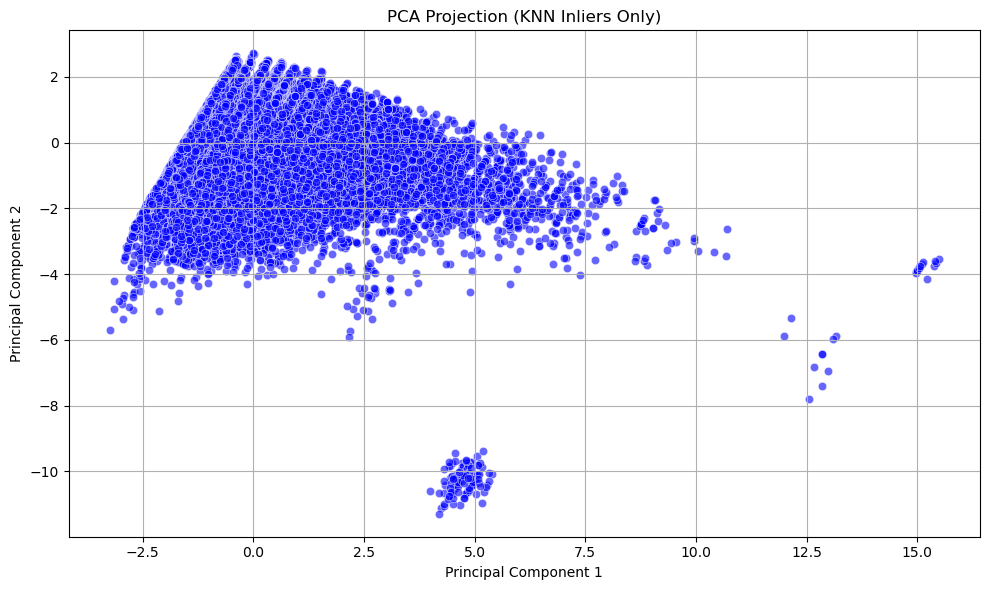

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrimi i të dhënave: vetëm inliers (jo outliers)
X_inliers = X_scaled[df_knn['is_outlier_knn'] == 0]

# PCA mbi inliers
pca = PCA(n_components=2)
X_pca_inliers = pca.fit_transform(X_inliers)

# Krijo DataFrame për vizualizim
pca_df_inliers = pd.DataFrame(X_pca_inliers, columns=['PC1', 'PC2'])

# Vizualizimi
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    data=pca_df_inliers,
    color='blue',
    alpha=0.6
)
plt.title('PCA Projection (KNN Inliers Only)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
# Shto ID për çdo DataFrame
df_iso = df_iso.copy()
df_iso['ID'] = df_iso.index
df_lof = df_lof.copy()
df_lof['ID'] = df_lof.index
df_knn = df_knn.copy()
df_knn['ID'] = df_knn.index

# Përzgjedh vetëm kolonat e nevojshme për bashkim
df_iforest_res = df_iso[['ID', 'IF_score', 'is_outlier_IF']]
df_lof_res = df_lof[['ID', 'LOF_score', 'is_outlier']]
df_knn_res = df_knn[['ID', 'knn_score', 'is_outlier_knn']]

# Riemërto për uniformitet
df_lof_res.rename(columns={'is_outlier': 'is_outlier_LOF'}, inplace=True)
df_knn_res.rename(columns={'knn_score': 'KNN_score'}, inplace=True)

# Bashkojmë sipas ID
df_all = df_iforest_res.merge(df_lof_res, on='ID').merge(df_knn_res, on='ID')

# Filtrojmë outliers të përbashkët në të tre metodat
common_outliers = df_all[
    (df_all['is_outlier_IF'] == True) &
    (df_all['is_outlier_LOF'] == True) &
    (df_all['is_outlier_knn'] == True)
]

# Tabela përfundimtare
common_outliers_table = common_outliers[['ID', 'IF_score', 'LOF_score', 'KNN_score']]
common_outliers_table = common_outliers_table.sort_values(by='IF_score', ascending=False)

# Shfaqim rezultatet
print("Outliers të përbashkët në të gjitha metodat:")
common_outliers_table


Outliers të përbashkët në të gjitha metodat:


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_2541/1437314450.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof_res.rename(columns={'is_outlier': 'is_outlier_LOF'}, inplace=True)
/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_2541/1437314450.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn_res.rename(columns={'knn_score': 'KNN_score'}, inplace=True)


,ID,IF_score,LOF_score,KNN_score
22889,22889,0.208116,9.978563,100.965232
12910,12910,0.166104,7.692670,60.299239
10092,10092,0.142181,8.184630,131.372673
59537,59537,0.137470,8.068319,149.306471
24239,24239,0.131552,7.548338,61.340708
12902,12902,0.130040,9.455734,156.407765
96671,96671,0.089328,6.230797,78.134113
13598,13598,0.049224,12.300436,117.732669
